In [635]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [525]:
# Read SOC excel files

soc2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2018.xlsx", header=7)
soc2018_changes = pd.read_excel("//Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_type_of_change_by_detail_occup.xlsx", header=8)
soc2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_structure_2010.xls", header=11)
soc2018_dm=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2018_direct_match_title_file.xlsx",header=7)

In [526]:
# Labelling columns and cleaning up


soc2018 = soc2018.rename(columns = {'Unnamed: 4':'Occupation'})
soc2018_dm=soc2018_dm.drop(columns={'Illustrative Example'})

In [527]:
# soc2018_dm['2018 SOC Direct Match Title']=soc2018_dm['2018 SOC Direct Match Title'].str.lower()

In [528]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [529]:
# deleted_soc=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/soc_2010_codes_deleted_in_2018.xlsx",header=7)
# deleted_soc['2010 SOC Title']=deleted_soc['2010 SOC Title'].str.lower()

In [382]:
# Reading in all the datasets from 2011-2021

df2021=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2021.xlsx",header=5)
df2020=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2020.xlsx",header=5)
df2019=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2019.xlsx",header=5)
df2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2018.xlsx",header=5)
df2017=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2017.xlsx",header=5)
df2016=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2016.xlsx",header=5)
df2015=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2015.xlsx",header=5)
df2014=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2014.xlsx",header=5)
df2013=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2013.xlsx",header=5)
df2012=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2012.xlsx",header=5)
df2011=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data/Age/cpsaat11b2011.xlsx",header=5)

In [383]:
# Add in the years and rename the columns

df2021['Unnamed: 10'] = 2021
df2020['Unnamed: 10'] = 2020
df2019['Unnamed: 10'] = 2019
df2018['Unnamed: 10'] = 2018
df2017['Unnamed: 10'] = 2017
df2016['Unnamed: 10'] = 2016
df2015['Unnamed: 10'] = 2015
df2014['Unnamed: 10'] = 2014
df2013['Unnamed: 10'] = 2013
df2012['Unnamed: 10'] = 2012
df2011['Unnamed: 10'] = 2011


df=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

df = df.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})


In [384]:
# Drop redundant rows, eg. blank rows
df.reset_index(drop=True, inplace=True)     # Reset index to ensure the correct rows are dropped
df=df.drop(index=df.groupby('Year').head(2).index)
df=df.drop(index=df.groupby('Year').tail(2).index)
df=df[df['Occupation'].notnull()]
df.reset_index(drop=True, inplace=True)

In [385]:
# Standardize all occupations to lowercase and remove double spaces

df['Occupation'] = df['Occupation'].str.lower()
df['Occupation']=df['Occupation'].str.replace(r'\s+', ' ', regex=True)

# Replace en dashes with hyphens

df['Median age']=df['Median age'].replace('–','-')


In [530]:
soc2018['Occupation']=soc2018['Occupation'].str.lower()

In [540]:
soc2018.loc[soc2018['Major Group'].notnull(),['Minor Group','Broad Group','Detailed Occupation']]='-'

In [542]:
soc2018['Major Group'].ffill(axis=0, inplace=True)

In [544]:
soc2018.loc[soc2018['Minor Group'].notnull(),['Broad Group','Detailed Occupation']]='-'

In [546]:
soc2018['Minor Group'].ffill(axis=0, inplace=True)

In [548]:
soc2018.loc[soc2018['Broad Group'].notnull(),['Detailed Occupation']]='-'

In [550]:
soc2018['Broad Group'].ffill(axis=0, inplace=True)

In [551]:
soc2018

,Major Group,Minor Group,Broad Group,Detailed Occupation,Occupation
0,11-0000,-,-,-,management occupations
1,11-0000,11-1000,-,-,top executives
2,11-0000,11-1000,11-1010,-,chief executives
3,11-0000,11-1000,11-1010,11-1011,chief executives
4,11-0000,11-1000,11-1020,-,general and operations managers
...,...,...,...,...,...
1442,55-0000,55-3000,55-3010,55-3014,artillery and missile crew members
1443,55-0000,55-3000,55-3010,55-3015,command and control center specialists
1444,55-0000,55-3000,55-3010,55-3016,infantry
1445,55-0000,55-3000,55-3010,55-3018,special forces


In [69]:
# duplicate['Broad Group']=duplicate['Broad Group'].ffill()

In [70]:
# duplicate.groupby(duplicate['Occupation']).head(0)['Detailed Occupation'].fillna(duplicate.groupby(duplicate['Occupation']).tail(0)['Detailed Occupation'])

In [71]:
# not_duplicate[not_duplicate['_merge']=='both']

In [72]:
# joint[joint['_merge']=='left_only']

In [73]:
# joint[joint['_merge']=='right_only']

2011-2019 have the same number of occupations (and presumably the same list of occupations): 572. Meanwhile 2020-2021 have 602 rows.

In [339]:
# joint[joint['_merge']=='both']

In [96]:
# df.groupby('Year').agg('count')

In [101]:
joint_deleted = pd.merge(left = df[df['Year']!=2021|2020], 
         right = deleted_soc,
        how= 'inner',
        left_on='Occupation',
        right_on='2010 SOC Title',
        indicator=True)

In [102]:
joint_deleted

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,2010 SOC Group,2010 SOC Code,2010 SOC Title,_merge
0,public relations and fundraising managers,95.0,0.0,4.0,21.0,29.0,20.0,17.0,4.0,43,2020,Detailed,11-2031,public relations and fundraising managers,both
1,public relations and fundraising managers,73.0,0.0,2.0,19.0,12.0,17.0,19.0,4.0,44.8,2019,Detailed,11-2031,public relations and fundraising managers,both
2,public relations and fundraising managers,69.0,0.0,1.0,13.0,19.0,21.0,10.0,6.0,45,2018,Detailed,11-2031,public relations and fundraising managers,both
3,public relations and fundraising managers,73.0,0.0,2.0,23.0,17.0,17.0,12.0,1.0,41.4,2017,Detailed,11-2031,public relations and fundraising managers,both
4,public relations and fundraising managers,62.0,0.0,2.0,19.0,17.0,16.0,8.0,1.0,42.8,2016,Detailed,11-2031,public relations and fundraising managers,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,mine shuttle car operators,4.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,–,2013,Detailed,53-7111,mine shuttle car operators,both
497,mine shuttle car operators,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,–,2012,Broad,53-7110,mine shuttle car operators,both
498,mine shuttle car operators,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,–,2012,Detailed,53-7111,mine shuttle car operators,both
499,mine shuttle car operators,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,–,2011,Broad,53-7110,mine shuttle car operators,both


In [23]:
joint = pd.merge(left = df[df['Year']==2021], 
         right = df[df['Year']==2018],
        how= 'outer',
        left_on='Occupation',
        right_on='Occupation',
        indicator=True)

Import Changes.xlsx

In [475]:
changes2010=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=0)
changes2018=pd.read_excel("/Users/terencetan/Documents/Uni stuff/Engineering Science/4YP/4YP-The-Future-of-Work/Data cleaning/Changes.xlsx",sheet_name=1)


In [476]:
# Remove unwanted columns

changes2010.drop(changes2010.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)
changes2018.drop(changes2018.columns[[0,2,3,4,5,6,7,8,9,10,11,14]],axis=1,inplace=True)

# Lower case all strings
changes2010['Occupation']=changes2010['Occupation'].str.lower()
changes2010['Action']=changes2010['Action'].str.lower()
changes2010['Map to']=changes2010['Map to'].str.lower()

changes2018['Occupation']=changes2018['Occupation'].str.lower()
changes2018['Action']=changes2018['Action'].str.lower()
changes2018['Map to']=changes2018['Map to'].str.lower()

In [477]:
# Remove all rows with 'Action' == '-' since no action needs to be taken

changes2018.drop(index=changes2018[changes2018['Action']=='-'].index,inplace=True)
changes2010.drop(index=changes2010[changes2010['Action']=='-'].index,inplace=True)

Carry out the 'change' action, i.e. renaming occupations

In [489]:
df_test=df[df['Year']>2019].copy()      # Rows with year >2019
test=changes2018.copy()

df_test2=df[df['Year']<2020].copy()     # Rows with year <2020
test2=changes2010.copy()

In [490]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')


joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename
joint_test.drop(joint_test.columns[[-1,-2]],axis=1,inplace=True)        # Drop unnecessary columns



# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='change'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
joint_test2.drop(joint_test2.columns[[-1,-2]],axis=1,inplace=True)      # Drop unnecessary columns

In [491]:
# Update df

df_test=joint_test
df_test2=joint_test2


In [492]:
# Remove 'change' action rows

test.drop(test[test['Action']=='change'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='change'].index,axis=0,inplace=True)

In [486]:
# # <2020
# joint_test2 = pd.merge(left = df_test2, 
#          right = test2[test2['Action']=='change'],
#         how= 'left',
#         left_on='Occupation',
#         right_on='Occupation')

# joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename
# joint_test2[joint_test2['Action']=='combine']

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,Action,Map to


In [493]:
df_test2

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year
0,"management, professional, and related occupations",64218.0,428.0,3402.0,15126.0,15133.0,14103.0,11360.0,4665.0,43.8,2019
1,"management, business, and financial operations...",26981.0,82.0,969.0,5529.0,6330.0,6469.0,5394.0,2208.0,45.9,2019
2,management occupations,18985.0,62.0,536.0,3452.0,4524.0,4731.0,4024.0,1655.0,47,2019
3,chief executives,1602.0,2.0,5.0,121.0,329.0,461.0,465.0,219.0,52.7,2019
4,general and operations managers,1058.0,0.0,19.0,258.0,282.0,257.0,196.0,46.0,44.2,2019
...,...,...,...,...,...,...,...,...,...,...,...
5071,pumping station operators,21.0,0.0,3.0,6.0,4.0,3.0,5.0,0.0,-,2011
5072,refuse and recyclable material collectors,92.0,2.0,12.0,22.0,16.0,24.0,12.0,4.0,41.3,2011
5073,mine shuttle car operators,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-,2011
5074,"tank car, truck, and ship loaders",3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-,2011


Carry out 'delete' action

In [494]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test[test['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test.drop(index=joint_test[joint_test['Action']=='delete'].index,axis=0,inplace=True)


# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2[test2['Action']=='delete'],
        how= 'left',
        left_on='Occupation',
        right_on='Occupation',)

df_test2.drop(index=joint_test2[joint_test2['Action']=='delete'].index,axis=0,inplace=True)

In [495]:
# Remove 'delete' action rows

test.drop(test[test['Action']=='delete'].index,axis=0,inplace=True)
test2.drop(test2[test2['Action']=='delete'].index,axis=0,inplace=True)

Carry out 'combine' and 'combine but keep' actions

In [496]:
# >2019
joint_test = pd.merge(left = df_test, 
         right = test,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep=joint_test.loc[joint_test['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test.loc[joint_test['Action'].notnull(),'Occupation']=joint_test.loc[joint_test['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum=joint_test.loc[joint_test['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x=pd.merge(left=joint_test.loc[joint_test['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x=x[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x['Median age']='-'     # Combined rows have no valid 'Median age'

y=pd.merge(left=joint_test, right=joint_sum[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z=pd.concat([y[y['_merge']!='both'],x]).drop(columns='_merge')          # Concat x and y
z=pd.concat([z,keep])           # Concat x and y with 'combined but keep' rows

# <2020
joint_test2 = pd.merge(left = df_test2, 
         right = test2,
        how= 'left',
        left_on='Occupation',
        right_on='Occupation')

keep2=joint_test2.loc[joint_test2['Action']=='combine but keep'].copy()        # Keep a copy of the 'combine but keep' occupations
joint_test2.loc[joint_test2['Action'].notnull(),'Occupation']=joint_test2.loc[joint_test2['Action'].notnull(),'Map to']     # Rename occupations to their combined occupations
joint_sum2=joint_test2.loc[joint_test2['Action'].notnull()].groupby(['Occupation','Year'],as_index=False).sum()            # Sum up the rows by Occupation and 'Year'
joint_test2.drop_duplicates(subset=['Occupation','Year'],inplace=True)           # Drop duplicate rows since we are combining

x2=pd.merge(left=joint_test2.loc[joint_test2['Action'].notnull(),['Occupation','Year','Action','Map to','Median age']], right=joint_sum2,how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'])  #Combined rows
x2=x2[['Occupation','Total','16-19','20-24','25-34','35-44','45-54','55-64','65<=','Median age','Year','Action','Map to']]        # Re-arrange columns
x2['Median age']='-'     # Combined rows have no valid 'Median age'

y2=pd.merge(left=joint_test2, right=joint_sum2[['Occupation','Year']],how='left',left_on=['Occupation','Year'],right_on=['Occupation','Year'],indicator=True)      # Rows that do not need to be combined

z2=pd.concat([y2[y2['_merge']!='both'],x2]).drop(columns='_merge')          # Concat x and y
z2=pd.concat([z2,keep2])           # Concat x and y with 'combined but keep' rows


Map to 2018 SOC

In [501]:
z2[(z2['Year']==2018)&(z2['Occupation']=='miscellaneous healthcare diagnosing or treating practitioners')]

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,Action,Map to
26,miscellaneous healthcare diagnosing or treatin...,218.0,0.0,12.0,50.0,44.0,53.0,46.0,15.0,-,2018,combine,miscellaneous healthcare diagnosing or treatin...


In [503]:
z2[(z2['Year']==2018)&(z2['Occupation']=='dental hygienists')]

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,Action,Map to
754,dental hygienists,178.0,0.0,12.0,45.0,33.0,42.0,36.0,11.0,44.3,2018,combine but keep,miscellaneous healthcare diagnosing or treatin...


In [553]:
joint_soc=pd.merge(right=soc2018,left=z,how='outer',left_on='Occupation',right_on='Occupation',indicator=True)

In [556]:
joint_soc.drop(columns=['Action','Map to'],inplace=True)

In [563]:
joint_soc[joint_soc['_merge']=='left_only']

,Occupation,Total,16-19,20-24,25-34,35-44,45-54,55-64,65<=,Median age,Year,Major Group,Minor Group,Broad Group,Detailed Occupation,_merge
0,"management, professional, and related occupations",64744.0,420.0,3267.0,15222.0,15625.0,14238.0,11394.0,4579.0,43.8,2021.0,NaN,NaN,NaN,NaN,left_only
1,"management, professional, and related occupations",63644.0,383.0,3157.0,15073.0,15346.0,14049.0,11166.0,4471.0,43.8,2020.0,NaN,NaN,NaN,NaN,left_only
2,"management, business, and financial operations...",27864.0,100.0,1052.0,5726.0,6783.0,6603.0,5411.0,2189.0,45.5,2021.0,NaN,NaN,NaN,NaN,left_only
3,"management, business, and financial operations...",27143.0,88.0,941.0,5526.0,6466.0,6622.0,5289.0,2210.0,45.8,2020.0,NaN,NaN,NaN,NaN,left_only
192,professional and related occupations,36880.0,320.0,2215.0,9496.0,8842.0,7634.0,5983.0,2390.0,42.6,2021.0,NaN,NaN,NaN,NaN,left_only
193,professional and related occupations,36502.0,295.0,2216.0,9546.0,8879.0,7427.0,5878.0,2261.0,42.4,2020.0,NaN,NaN,NaN,NaN,left_only
382,"education, training, and library occupations",8946.0,120.0,610.0,1989.0,2121.0,2064.0,1446.0,596.0,43.2,2021.0,NaN,NaN,NaN,NaN,left_only
383,"education, training, and library occupations",8902.0,111.0,607.0,2045.0,2166.0,1957.0,1427.0,590.0,42.8,2020.0,NaN,NaN,NaN,NaN,left_only
532,service occupations,24403.0,2159.0,3374.0,5314.0,4456.0,4142.0,3538.0,1420.0,38.3,2021.0,NaN,NaN,NaN,NaN,left_only
533,service occupations,22853.0,1813.0,3057.0,4922.0,4312.0,4001.0,3372.0,1375.0,39,2020.0,NaN,NaN,NaN,NaN,left_only


In [564]:
joint_soc2=pd.merge(right=soc2018,left=z2,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

In [568]:
df_processed = pd.concat([z,z2])

In [578]:
joint_processed=pd.merge(left=df_processed,right=soc2018,how='inner',left_on='Occupation',right_on='Occupation',indicator=True)

Plots

[[0.63871909]
 [0.64315746]
 [0.6426363 ]
 [0.64286251]
 [0.64302512]
 [0.64447027]
 [0.64477589]
 [0.64428194]
 [0.64570453]
 [0.64425725]
 [0.64389406]]


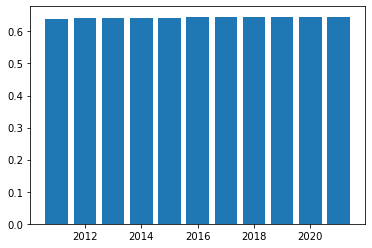

In [687]:
detailed=joint_processed[joint_processed['Detailed Occupation']!='-']
detailed_sum=detailed.groupby(['Year']).sum()
detailed_sum_arr=detailed_sum['Total'].to_numpy()

total=pd.concat([df2021,df2020,df2019,df2018,df2017,df2016,df2015,df2014,df2013,df2012,df2011])

total = total.rename(columns={'Unnamed: 0':'Occupation','Unnamed: 1':'Total','Unnamed: 2':'16-19','Unnamed: 3':'20-24','Unnamed: 4':'25-34','Unnamed: 5':'35-44','Unnamed: 6':'45-54','Unnamed: 7':'55-64','Unnamed: 8':'65<=','Unnamed: 9':'Median age','Unnamed: 10':'Year'})

total_arr=total.loc[total['Occupation']=='Total employed',['Total']].to_numpy()
total_arr=np.flip(total_arr)


detailed_sum_arr=detailed_sum_arr.reshape(-1,1)

year=[2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

plt.bar(year,(detailed_sum_arr/total_arr).reshape(11,))     # Proportion of Detailed occupations wrt total employed
print((detailed_sum_arr/total_arr))

[[0.93836375]
 [0.94002204]
 [0.94008852]
 [0.94063771]
 [0.94013465]
 [0.94092554]
 [0.93990361]
 [0.94019042]
 [0.93998908]
 [0.93976116]
 [0.94136229]]


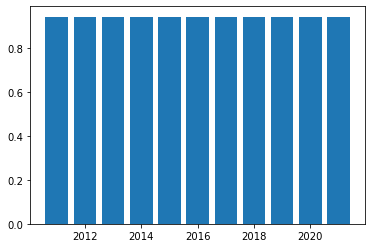

In [689]:
major=joint_processed[(joint_processed['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]
major_sum=major.groupby(['Year']).sum()
major_sum_arr=major_sum['Total'].to_numpy()

major_sum_arr=major_sum_arr.reshape(-1,1)

plt.bar(year,(major_sum_arr/total_arr).reshape(11,))     # Proportion of Major Group occupations wrt total employed
print((major_sum_arr/total_arr))

In [768]:
young=joint_processed.iloc[:,2:7].sum(axis=1)
old=joint_processed['65<=']

ratio=old/young
ratio=pd.concat([joint_processed[['Occupation','Year','Major Group','Minor Group','Broad Group','Detailed Occupation']],ratio],axis=1)
ratio=ratio.rename(columns={0:'Ratio'})
ratio_major = ratio[(ratio['Minor Group']=='-')&(joint_processed['Broad Group']=='-')&(joint_processed['Detailed Occupation']=='-')]

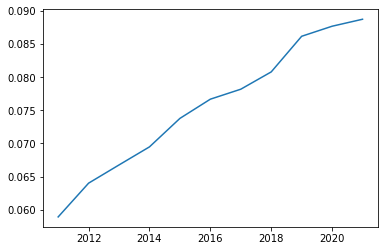

In [775]:
ratio_major_mean=ratio_major.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_major_mean)      # Change in ratio over Major Groups over the years

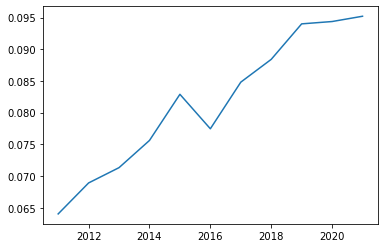

In [774]:
ratio_detailed=ratio[ratio['Detailed Occupation']!='-']
ratio_detailed_mean=ratio_detailed.loc[ratio['Ratio']!=np.inf,['Year','Ratio']].groupby('Year').agg('mean')     # Note than certain ratios are inf because those occupations have zero young people; need to filter them out first
plt.plot(ratio_detailed_mean)      # Change in ratio over Detailed Occupations over the years


In [776]:
# ratio[ratio['Ratio']==np.inf]

Text(0.5, 1.0, 'Percentage change of ratio from 2011 to 2021 among Major Groups')

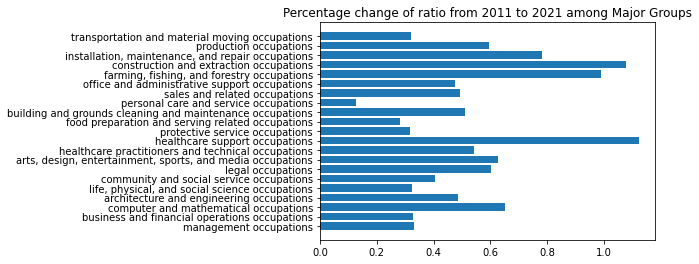

In [806]:
ratio_two_years=ratio_major[(ratio_major['Year']==2021)|(ratio_major['Year']==2011)]
ratio_2011=ratio_two_years.loc[ratio_two_years['Year']==2011,'Ratio'].to_numpy()
ratio_2021=ratio_two_years.loc[ratio_two_years['Year']==2021,'Ratio'].to_numpy()

plt.barh(ratio_two_years.drop_duplicates('Occupation')['Occupation'],(ratio_2021-ratio_2011)/ratio_2011)
plt.title('Percentage change of ratio from 2011 to 2021 among Major Groups')        # Percentage change of ratio from 2011 to 2021 among Major Groups